# Introduction to Convolutional Neural Networks and Computer Vision with tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2022-10-16 20:58:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 74.125.134.128, 74.125.139.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   146MB/s    in 0.7s    

2022-10-16 20:58:40 (146 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become on with it)

A very crucial step at the beginning of any machine learning proejct is becoming one with the data.

And for a computer vision project, this usually means visualizing invidual samples of the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

In [ ]:
import os

# Walk through the pizza steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directoreis and {len(filenames)} images in '{dirpath}.")


There are 2 directoreis and 0 images in 'pizza_steak.
There are 2 directoreis and 0 images in 'pizza_steak/train.
There are 0 directoreis and 750 images in 'pizza_steak/train/steak.
There are 0 directoreis and 750 images in 'pizza_steak/train/pizza.
There are 2 directoreis and 0 images in 'pizza_steak/test.
There are 0 directoreis and 250 images in 'pizza_steak/test/steak.
There are 0 directoreis and 250 images in 'pizza_steak/test/pizza.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train=len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [ ]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #Created a list of class names from the subdirectories
print(class_names)


['pizza' 'steak']


In [1]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f'Image shape: {img.shape}') #show the shape of the image
  return img


Image shape: (512, 512, 3)


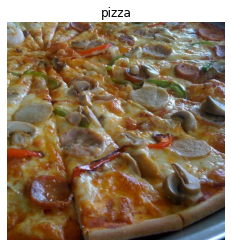

In [ ]:
# View a random image from the training dataset

img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(383, 512, 3), dtype=uint8, numpy=
array([[[ 43,  55,  51],
        [ 47,  62,  59],
        [ 45,  59,  59],
        ...,
        [128, 124, 121],
        [145, 137, 134],
        [146, 136, 134]],

       [[ 44,  56,  52],
        [ 45,  57,  55],
        [ 41,  55,  55],
        ...,
        [132, 128, 125],
        [156, 151, 148],
        [149, 141, 138]],

       [[ 48,  60,  58],
        [ 46,  58,  58],
        [ 44,  58,  58],
        ...,
        [120, 119, 115],
        [153, 148, 145],
        [151, 146, 143]],

       ...,

       [[ 80,  57,  77],
        [ 82,  59,  79],
        [ 84,  61,  81],
        ...,
        [180, 195, 198],
        [180, 195, 198],
        [181, 195, 198]],

       [[ 81,  60,  79],
        [ 83,  62,  81],
        [ 85,  64,  83],
        ...,
        [179, 194, 197],
        [179, 194, 197],
        [180, 195, 198]],

       [[ 83,  62,  81],
        [ 83,  62,  81],
        [ 82,  61,  80],
        ...,
        [178, 193, 19

In [ ]:
# View the image shape
img.shape #returns width, height, color channels

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 and 1
img/255.


## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically, we need a way to: 

* Load our images
* Preprocess our images
* Build our CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

#preprocess the data(get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"
# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, 
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode ="binary",
                                               seed=42)
# Build a CNN model (same as Tiny VGG on the CNN explainer website)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# fit the model
history_1 = model_1.fit(train_data, 
                        epochs = 5, 
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps=len(valid_data))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow Playground model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data, epochs=5, 
                        steps_per_epoch=len(train_data), 
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 0.9755 - accuracy: 0.5153 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data, epochs = 5, steps_per_epoch = len(train_data),
                        validation_data =valid_data, validation_steps = len(valid_data))


Epoch 1/5
47/47 [==============================] - 12s 244ms/step - loss: 2.9759 - accuracy: 0.6393 - val_loss: 0.4928 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.8656 - accuracy: 0.7100 - val_loss: 0.7707 - val_accuracy: 0.7000
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6907 - accuracy: 0.7487 - val_loss: 0.7778 - val_accuracy: 0.6860
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6379 - accuracy: 0.7500 - val_loss: 1.1071 - val_accuracy: 0.6760
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6788 - accuracy: 0.7520 - val_loss: 0.6696 - val_accuracy: 0.7220


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize)
2. Preprocess the data (scaling, prepared it for model)
3. Created a model
4. Fit the model
5. Evalutate the model
6. Adjust parameters and improve the model
7. Repeat until satisfied(experiment a lot)

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


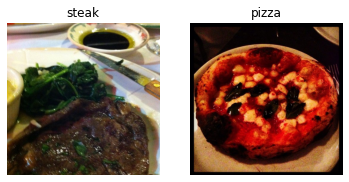

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img=view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")



In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


### 2. Preprocess the data

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir, #Target directory of images
                                               target_size=(224,224), #target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) #size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch

images, labels = train_data.next() # get the "next" batch of images/labels in train data

len(images), len(labels)


(32, 32)

In [ ]:
# How many batches are there

len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.15294118, 0.1254902 , 0.08627451],
          [0.15294118, 0.14117648, 0.10588236],
          [0.13333334, 0.13725491, 0.10588236],
          ...,
          [0.11764707, 0.08235294, 0.04705883],
          [0.14117648, 0.09019608, 0.05882353],
          [0.16470589, 0.10588236, 0.09411766]],
 
         [[0.13333334, 0.10588236, 0.06666667],
          [0.13725491, 0.12156864, 0.08627451],
          [0.1137255 , 0.1137255 , 0.08235294],
          ...,
          [0.12941177, 0.09411766, 0.05882353],
          [0.14901961, 0.09803922, 0.06666667],
          [0.15686275, 0.09803922, 0.08627451]],
 
         [[0.13333334, 0.09803922, 0.0627451 ],
          [0.13725491, 0.10980393, 0.07843138],
          [0.11764707, 0.10196079, 0.06666667],
          ...,
          [0.12941177, 0.09803922, 0.05490196],
          [0.14509805, 0.10588236, 0.07058824],
          [0.15294118, 0.09411766, 0.07450981]],
 
         ...,
 
         [[0.14509805, 0.09411766, 0.0627451 ],
          [0.14509

In [ ]:
# View the first batch of labels

labels

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment
and then as you keep experimenting, you try and beat the baseline

**Note:** In deep learning, there is almost an infinite amount of architechtures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data, and then introduce complexity as required (e.g., look at which current model is performing best in the field for your problem)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a 3-layer convolutional neural network)

model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") #output layer 
])

In [ ]:
model_4.summary()

### 4. Compile the model

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


### 5. Fit the model

In [ ]:
history_4 = model_4.fit(train_data,
                      epochs = 5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 10s 210ms/step - loss: 0.9085 - accuracy: 0.6820 - val_loss: 0.4213 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4234 - accuracy: 0.8187 - val_loss: 0.3976 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.2864 - accuracy: 0.8927 - val_loss: 0.3723 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.1375 - accuracy: 0.9607 - val_loss: 0.3716 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0625 - accuracy: 0.9867 - val_loss: 0.3948 - val_accuracy: 0.8440


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

In [ ]:
#Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [29]:
# Plot the validation and training curves separately

def plot_loss_curves(history):
  """
  Return separate loss curves for training and validation metrics
  """
  loss= history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))   

  #plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.xlabel("epochs")
  plt.title("loss")
  plt.legend();
  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.xlabel("epochs")
  plt.title("accuracy")  
  plt.legend();


**Note:** When a model's validation loss starts to increase, it's likely that the model is **overfitting** the training dataset. This means that it is learning the patterns in the training data set too well, thus the model's ability to generalize to unseen data will be diminished

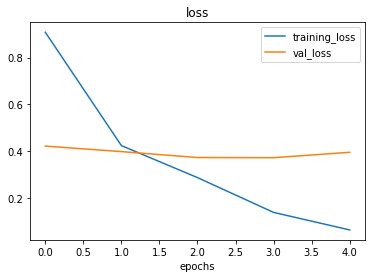

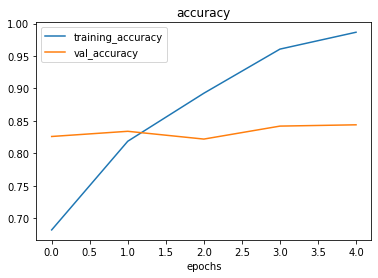

In [ ]:
# Check out the loss and accuracy of model 4

plot_loss_curves(history_4)

### 6. Adjust the model's parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a label
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [ ]:
# create the model (this is going to be our new baseline)

model_5 =  Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


In [ ]:
#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 11s 196ms/step - loss: 0.6201 - accuracy: 0.6880 - val_loss: 0.4958 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4642 - accuracy: 0.7953 - val_loss: 0.3895 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4095 - accuracy: 0.8220 - val_loss: 0.3514 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3846 - accuracy: 0.8347 - val_loss: 0.3360 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3540 - accuracy: 0.8567 - val_loss: 0.3133 - val_accuracy: 0.8740


In [ ]:
model_5.summary()

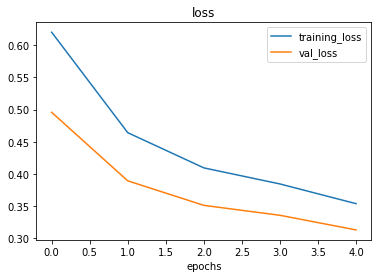

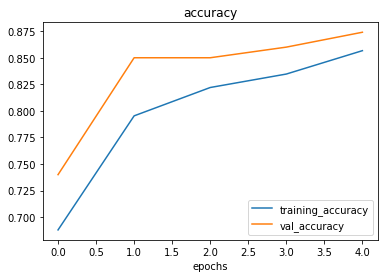

In [ ]:
#plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageGenerator without data augmentation for test data set
test_datagen = ImageDataGenerator(rescale=1/255.)




In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                               target_size=(224,224),
                                                               batch_size=32,
                                                               class_mode="binary",
                                                               shuffle=False) # for demonstration purposes only
# create non augmented train batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode="binary",
                                                  shuffle=False)
# create non-augmented test data batches
print("non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")


Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
non-augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()



showing image number: 6


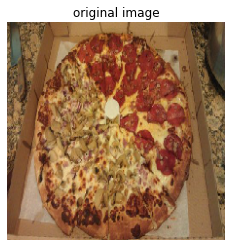

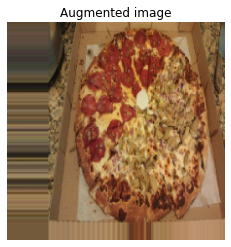

In [ ]:
# Show the original image and the augmented image
import random
randomN = random.randint(0, 32) #our batch sizes are 32...
print(f"showing image number: {randomN}")
plt.imshow(images[randomN])
plt.title("original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[randomN])
plt.title(f'Augmented image')
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

In [ ]:
# Create a model (same as model 5)

model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")         
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_6 = model_6.fit(train_data_augmented, #fitting model_6 on augmented training data
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))


Epoch 1/5
47/47 [==============================] - 22s 465ms/step - loss: 0.7011 - accuracy: 0.5773 - val_loss: 0.7289 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 461ms/step - loss: 0.6833 - accuracy: 0.5593 - val_loss: 0.7719 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 22s 460ms/step - loss: 0.7023 - accuracy: 0.5147 - val_loss: 0.6676 - val_accuracy: 0.6400
Epoch 4/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6749 - accuracy: 0.6367 - val_loss: 0.6183 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 22s 478ms/step - loss: 0.6609 - accuracy: 0.6140 - val_loss: 0.5838 - val_accuracy: 0.8260


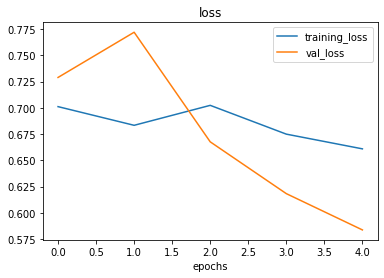

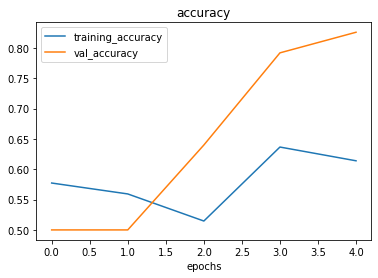

In [ ]:
# Check our models training curves

plot_loss_curves(history_6)

In [ ]:
# shuffled data

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            shuffle=True)


Found 1500 images belonging to 2 classes.


In [ ]:
# create model

model_7 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch= len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))


Epoch 1/5
47/47 [==============================] - 31s 460ms/step - loss: 0.6611 - accuracy: 0.6000 - val_loss: 0.5468 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5399 - accuracy: 0.7267 - val_loss: 0.4141 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 21s 450ms/step - loss: 0.4966 - accuracy: 0.7600 - val_loss: 0.3680 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 22s 471ms/step - loss: 0.4869 - accuracy: 0.7787 - val_loss: 0.3457 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 21s 454ms/step - loss: 0.4612 - accuracy: 0.7900 - val_loss: 0.3141 - val_accuracy: 0.8760


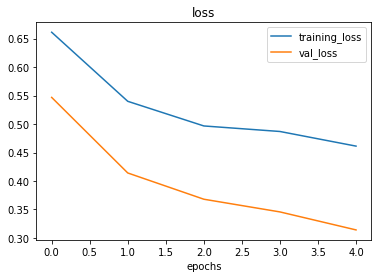

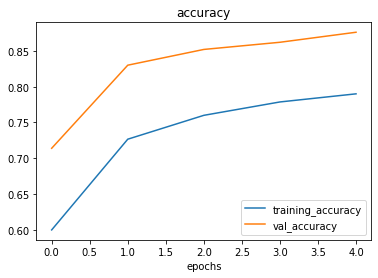

In [ ]:
plot_loss_curves(history_7)

### 7. Repeat until satisfied

Since we beat baseline, to improve:

* Increase model layers
* Increase filters in each conv layer
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data
* Use **transfer learning**

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")


--2022-10-16 05:51:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-10-16 05:51:29 (32.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

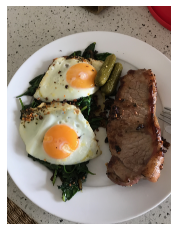

In [ ]:
plt.imshow(steak)
plt.axis(False) 

In [ ]:
# check the shape of our image
steak.shape

(4032, 3024, 3)

In [ ]:
# create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename and turns it into a tensor and reshapes it 
  to (img_shape, img_shape, color_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image (get all values between 0 and 1)
  img = img/255
  return img

In [ ]:
#load in and preprocess our custom image

steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 64ms/step


array([[0.8164038]], dtype=float32)

In [ ]:
#visualize image and model prediction

#remind ourselves of class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing on class_names
pred_class=class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and 
  plots the image with the predicted class as the title
  """
  #import target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'prediction: {pred_class}')
  plt.axis(False)



1/1 [==============================] - 0s 69ms/step


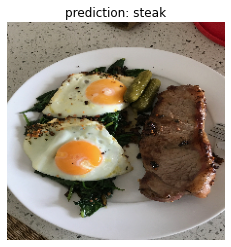

In [ ]:
#test model on custom image
pred_and_plot(model_7, "03-steak.jpeg")

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg


1/1 [==============================] - 0s 39ms/step


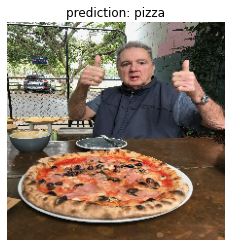

In [ ]:
pred_and_plot(model_7, "03-pizza-dad.jpeg")

In [ ]:
!wget https://hips.hearstapps.com/hmg-prod/images/how-to-grill-steak-1653399983.jpeg?crop=1.00xw:0.501xh;0,0.392xh&resize=1200:*

1/1 [==============================] - 0s 30ms/step


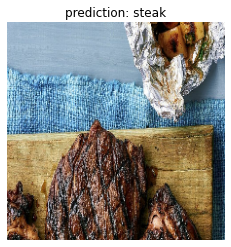

In [ ]:
pred_and_plot(model_7, "how-to-grill-steak-1653399983.jpeg?crop=1.00xw:0.501xh")

## Multi-Class Image Classification

We've just been to a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve model (beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#Unzip data

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2022-10-17 02:53:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   152MB/s    in 3.4s    

2022-10-17 02:53:39 (144 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

#Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")



There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [4]:
#Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"



In [5]:
#Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (288, 512, 3)


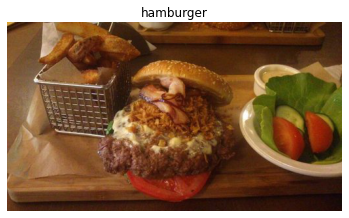

In [6]:
#Visualize 
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data(prepare it for a model)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(1/255.)
test_datagen = ImageDataGenerator(1/255.)

In [24]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size=(224,224),
                                             class_mode='categorical',
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [14]:
images, labels = train_data.next()


/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### 3. Create a model (start with a baseline)

In [25]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Activation

# create mode

model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation(activation="relu"),
    Conv2D(10, 3),
    Activation(activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])



In [26]:
# compile
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



In [30]:
# fit
history_8 = model_8.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


235/235 [==============================] - 48s 206ms/step - loss: 0.4158 - accuracy: 0.8741 - val_loss: 4.4452 - val_accuracy: 0.1828
Epoch 2/5
235/235 [==============================] - 52s 223ms/step - loss: 0.2557 - accuracy: 0.9301 - val_loss: 5.7923 - val_accuracy: 0.1752
Epoch 3/5
235/235 [==============================] - 48s 206ms/step - loss: 0.2770 - accuracy: 0.9200 - val_loss: 5.9474 - val_accuracy: 0.1696
Epoch 4/5
235/235 [==============================] - 48s 205ms/step - loss: 0.1973 - accuracy: 0.9440 - val_loss: 6.4876 - val_accuracy: 0.1784
Epoch 5/5
235/235 [==============================] - 49s 209ms/step - loss: 0.1550 - accuracy: 0.9561 - val_loss: 8.1678 - val_accuracy: 0.1716


### 5. Evaluate the model

In [31]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 17s 211ms/step - loss: 8.1678 - accuracy: 0.1716


[8.167844772338867, 0.17159999907016754]

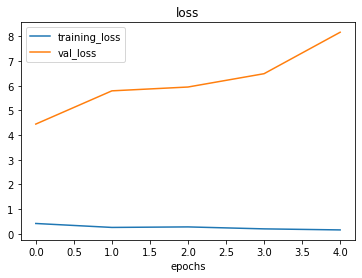

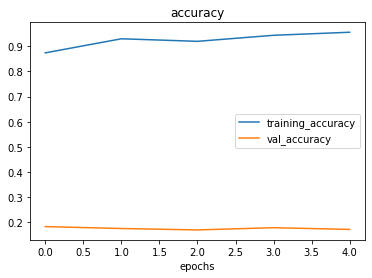

In [32]:
# Check out the model's loss curve

plot_loss_curves(history_8)